<font size="6"> **Model Building** </font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from mle_quant_utils import mle_utils

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import yaml
import os

# Retrieve parameters from configuration file
with open("../conf.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

In [4]:
INPATH =  "../data/" + cfg['output']['main'] + "/" + cfg['output']['raw']['folder'] + "/"
INFILE1 = cfg['output']['alpha_factors_ml']['features']
INFILE2 = cfg['output']['alpha_factors_ml']['targets']

In [5]:
TAU = cfg['models']['alpha_ml']['tau']
target_col = cfg['models']['alpha_ml']['target_col']

In [6]:
splits = cfg['models']['alpha_ml']['splits']
split_col = cfg['models']['alpha_ml']['split_col']

# Load Data

In [7]:
features_df = pd.read_csv(INPATH + INFILE1, parse_dates=['date'], index_col=[0,1])
split = features_df.pop(split_col)
split[split == 'valid'] = 'train'
pd.concat([features_df.head(2), features_df.tail(2)], axis=0)

Mean_Reversion_Sector_Neutral_Smoothed  \
date                      asset                                           
2013-01-03 00:00:00+00:00 A                                   -0.795709   
                          AAL                                  0.558847   
2015-12-28 00:00:00+00:00 ZION                                 0.773366   
                          ZTS                                 -0.944433   

                                 Momentum_1YR_Smoothed  \
date                      asset                          
2013-01-03 00:00:00+00:00 A                  -1.230279   
                          AAL                 1.713471   
2015-12-28 00:00:00+00:00 ZION               -0.188031   
                          ZTS                 0.209727   

                                 Overnight_Sentiment_Smoothed  adv_120d  \
date                      asset                                           
2013-01-03 00:00:00+00:00 A                         -1.301799  1.338573   
                          AAL                       -1.632765  1.139994   
2015-12-28 00:00:00+00:00 ZION                       1.325552 -0.965002   
                          ZTS                        0.441851  0.229762   

                                  adv_20d  dispersion_120d  dispersion_20d  \
date                      asset                                              
2013-01-03 00:00:00+00:00 A      1.397411         0.013270        0.011178   
                          AAL    1.081155         0.013270        0.011178   
2015-12-28 00:00:00+00:00 ZION  -0.724635         0.014916        0.014731   
                          ZTS   -0.180275         0.014916        0.014731   

                                 market_vol_120d  market_vol_20d  \
date                      asset                                    
2013-01-03 00:00:00+00:00 A             0.127654        0.135452   
                          AAL           0.127654        0.135452   
2015-12-28 00:00:00+00:00 ZION          0.183680        0.181479   
                          ZTS           0.183680        0.181479   

                                 volatility_120d  ...  sector_code_10  qtr_1  \
date                      asset                   ...                          
2013-01-03 00:00:00+00:00 A            -0.836546  ...               0      1   
                          AAL           1.639924  ...               0      1   
2015-12-28 00:00:00+00:00 ZION          0.547895  ...               0      0   
                          ZTS           0.413572  ...               0      0   

                                 qtr_2  qtr_3  qtr_4  weekday_0  weekday_1  \
date                      asset                                              
2013-01-03 00:00:00+00:00 A          0      0      0          0          0   
                          AAL        0      0      0          0          0   
2015-12-28 00:00:00+00:00 ZION       0      0      1          1          0   
                          ZTS        0      0      1          1          0   

                                 weekday_2  weekday_3  weekday_4  
date                      asset                                   
2013-01-03 00:00:00+00:00 A              0          1          0  
                          AAL            0          1          0  
2015-12-28 00:00:00+00:00 ZION           0          0          0  
                          ZTS            0          0          0  

[4 rows x 38 columns]

In [8]:
targets_df = pd.read_csv(INPATH + INFILE2, parse_dates=['date'], index_col=[0,1])
targets_df[target_col] = targets_df.groupby(level=1)['return_5d_raw'].shift(-TAU)
pd.concat([targets_df.head(2), targets_df.tail(2)], axis=0)

return_5d_raw    target
date                      asset                         
2013-01-03 00:00:00+00:00 A           0.013820 -0.009169
                          AAL         0.056681  0.107664
2015-12-28 00:00:00+00:00 ZION        0.040065       NaN
                          ZTS         0.032838       NaN

In [9]:
all_factors = features_df.join(targets_df[[target_col]]).dropna()
pd.concat([all_factors.head(2), all_factors.tail(2)], axis=0)

Mean_Reversion_Sector_Neutral_Smoothed  \
date                      asset                                           
2013-01-03 00:00:00+00:00 A                                   -0.795709   
                          AAL                                  0.558847   
2015-12-18 00:00:00+00:00 ZION                                 0.317187   
                          ZTS                                 -1.179650   

                                 Momentum_1YR_Smoothed  \
date                      asset                          
2013-01-03 00:00:00+00:00 A                  -1.230279   
                          AAL                 1.713471   
2015-12-18 00:00:00+00:00 ZION               -0.043392   
                          ZTS                 0.339902   

                                 Overnight_Sentiment_Smoothed  adv_120d  \
date                      asset                                           
2013-01-03 00:00:00+00:00 A                         -1.301799  1.338573   
                          AAL                       -1.632765  1.139994   
2015-12-18 00:00:00+00:00 ZION                       0.335806 -1.007419   
                          ZTS                       -0.979141  0.279250   

                                  adv_20d  dispersion_120d  dispersion_20d  \
date                      asset                                              
2013-01-03 00:00:00+00:00 A      1.397411         0.013270        0.011178   
                          AAL    1.081155         0.013270        0.011178   
2015-12-18 00:00:00+00:00 ZION  -0.929654         0.014845        0.014811   
                          ZTS   -0.151997         0.014845        0.014811   

                                 market_vol_120d  market_vol_20d  \
date                      asset                                    
2013-01-03 00:00:00+00:00 A             0.127654        0.135452   
                          AAL           0.127654        0.135452   
2015-12-18 00:00:00+00:00 ZION          0.180676        0.156946   
                          ZTS           0.180676        0.156946   

                                 volatility_120d  ...  qtr_1  qtr_2  qtr_3  \
date                      asset                   ...                        
2013-01-03 00:00:00+00:00 A            -0.836546  ...      1      0      0   
                          AAL           1.639924  ...      1      0      0   
2015-12-18 00:00:00+00:00 ZION          0.526686  ...      0      0      0   
                          ZTS           0.491338  ...      0      0      0   

                                 qtr_4  weekday_0  weekday_1  weekday_2  \
date                      asset                                           
2013-01-03 00:00:00+00:00 A          0          0          0          0   
                          AAL        0          0          0          0   
2015-12-18 00:00:00+00:00 ZION       1          0          0          0   
                          ZTS        1          0          0          0   

                                 weekday_3  weekday_4    target  
date                      asset                                  
2013-01-03 00:00:00+00:00 A              1          0 -0.009169  
                          AAL            1          0  0.107664  
2015-12-18 00:00:00+00:00 ZION           0          1  0.040065  
                          ZTS            0          1  0.032838  

[4 rows x 39 columns]

# Exploratory Data Analysis

In [10]:
alpha_factors = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']
quant_features = ['adv_120d', 'adv_20d', 'dispersion_120d', 'dispersion_20d', 'market_vol_120d', 'market_vol_20d']

In [11]:
all_factors[quant_features].describe().T

,count,mean,std,min,25%,50%,75%,max
adv_120d,358834.0,6.732487e-19,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
adv_20d,358834.0,1.089079e-19,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
dispersion_120d,358834.0,1.240786e-02,0.000596,0.008892,0.012027,0.012305,0.012699,0.017939
dispersion_20d,358834.0,1.255848e-02,0.001711,0.008892,0.011332,0.012310,0.013533,0.018303
market_vol_120d,358834.0,1.248925e-01,0.018821,0.086119,0.114243,0.120661,0.132521,0.181850
market_vol_20d,358834.0,1.212814e-01,0.043402,0.050347,0.092537,0.112221,0.142428,0.305171


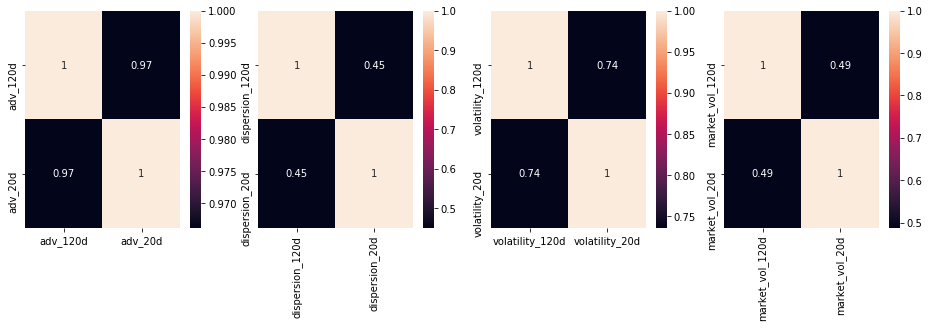

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
ax = axs[0]
sns.heatmap(all_factors[['adv_120d', 'adv_20d']].corr(),annot=True, ax=ax)
ax = axs[1]
sns.heatmap(all_factors[['dispersion_120d', 'dispersion_20d']].corr(),annot=True, ax=ax)
ax = axs[2]
sns.heatmap(all_factors[['volatility_120d', 'volatility_20d']].corr(),annot=True, ax=ax)
ax = axs[3]
sns.heatmap(all_factors[['market_vol_120d', 'market_vol_20d']].corr(),annot=True, ax=ax)

plt.show()

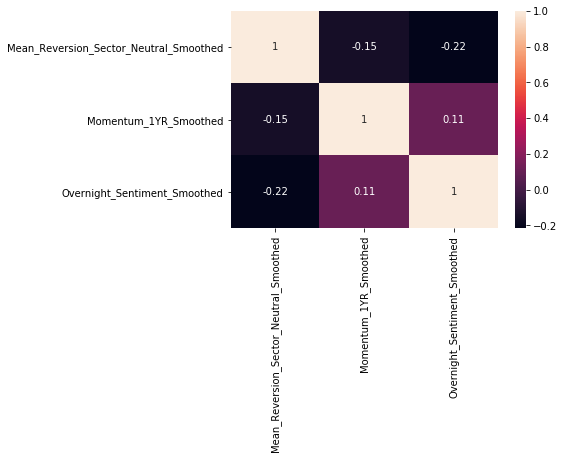

In [13]:
sns.heatmap(all_factors[alpha_factors].corr(),annot=True)
plt.show()

In [14]:
features_full = features_df.columns.tolist()

In [15]:
features = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed',
       'Overnight_Sentiment_Smoothed', 'adv_20d',
       'dispersion_120d', 'dispersion_20d', 'market_vol_120d','market_vol_20d', 'volatility_20d',
       'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2',
       'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6',
       'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10']

In [16]:
idx_dt = all_factors.index.get_level_values(0)
sampling = np.random.randint(0, 5, len(idx_dt))

all_factors_smp = all_factors.loc[idx_dt.weekday == sampling].copy()

pd.concat([all_factors_smp.head(2), all_factors_smp.tail(2)], axis=0)

Mean_Reversion_Sector_Neutral_Smoothed  \
date                      asset                                           
2013-01-03 00:00:00+00:00 ADM                                  0.736493   
                          ADP                                  1.432276   
2015-12-18 00:00:00+00:00 XRAY                                 1.500401   
                          ZTS                                 -1.179650   

                                 Momentum_1YR_Smoothed  \
date                      asset                          
2013-01-03 00:00:00+00:00 ADM                -1.096472   
                          ADP                -0.843726   
2015-12-18 00:00:00+00:00 XRAY                0.354366   
                          ZTS                 0.339902   

                                 Overnight_Sentiment_Smoothed  adv_120d  \
date                      asset                                           
2013-01-03 00:00:00+00:00 ADM                        0.389804  0.433933   
                          ADP                       -1.375347  0.125032   
2015-12-18 00:00:00+00:00 XRAY                       0.208553 -1.304343   
                          ZTS                       -0.979141  0.279250   

                                  adv_20d  dispersion_120d  dispersion_20d  \
date                      asset                                              
2013-01-03 00:00:00+00:00 ADM    0.382449         0.013270        0.011178   
                          ADP    0.117677         0.013270        0.011178   
2015-12-18 00:00:00+00:00 XRAY  -1.283134         0.014845        0.014811   
                          ZTS   -0.151997         0.014845        0.014811   

                                 market_vol_120d  market_vol_20d  \
date                      asset                                    
2013-01-03 00:00:00+00:00 ADM           0.127654        0.135452   
                          ADP           0.127654        0.135452   
2015-12-18 00:00:00+00:00 XRAY          0.180676        0.156946   
                          ZTS           0.180676        0.156946   

                                 volatility_120d  ...  qtr_1  qtr_2  qtr_3  \
date                      asset                   ...                        
2013-01-03 00:00:00+00:00 ADM          -0.261651  ...      1      0      0   
                          ADP          -1.308254  ...      1      0      0   
2015-12-18 00:00:00+00:00 XRAY         -0.979141  ...      0      0      0   
                          ZTS           0.491338  ...      0      0      0   

                                 qtr_4  weekday_0  weekday_1  weekday_2  \
date                      asset                                           
2013-01-03 00:00:00+00:00 ADM        0          0          0          0   
                          ADP        0          0          0          0   
2015-12-18 00:00:00+00:00 XRAY       1          0          0          0   
                          ZTS        1          0          0          0   

                                 weekday_3  weekday_4    target  
date                      asset                                  
2013-01-03 00:00:00+00:00 ADM            1          0  0.001420  
                          ADP            1          0  0.008349  
2015-12-18 00:00:00+00:00 XRAY           0          1  0.022689  
                          ZTS            0          1  0.032838  

[4 rows x 39 columns]

# Data Splitting

In [22]:
X_train_smp = all_factors_smp.loc[split.isin(['train', 'valid']), features_full].copy()
y_train_smp = all_factors_smp.loc[split.isin(['train', 'valid']), target_col].copy()
X_test_smp = all_factors_smp.loc[split == 'test', features_full].copy()
y_test_smp = all_factors_smp.loc[split == 'test', target_col].copy()

In [23]:
X_train_full = all_factors.loc[split.isin(['train', 'valid']), features_full].copy()
y_train_full = all_factors.loc[split.isin(['train', 'valid']), target_col].copy()
X_test_full = all_factors.loc[split == 'test', features_full].copy()
y_test_full = all_factors.loc[split == 'test', target_col].copy()

In [24]:
KFOLDS = 3
tscv_smp = TimeSeriesSplit(n_splits=KFOLDS).split(y_train_smp)
tscv_full = TimeSeriesSplit(n_splits=KFOLDS).split(y_train_full)